In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px
from sklearn.metrics import silhouette_score, davies_bouldin_score

import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
data = pd.read_csv("/content/logika_fuzzy.csv")
print(data.isnull().values.any())
X = data.drop(['Timestamp','Email','Nama/Inisial','Jenis Kelamin','Usia','Pekerjaan (Mis. Mahasiswa)','Alamat','Keterangan','Informed Consent','Apakah Anda pernah menggunakan aplikasi atau sistem yang memberikan rekomendasi tempat kuliner sebelumnya?'], axis = 1)
print(X)

True
    Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?  \
0                                                   4                          
1                                                   5                          
2                                                   1                          
3                                                   2                          
4                                                   2                          
..                                                ...                          
71                                                  5                          
72                                                  4                          
73                                                  2                          
74                                                  5                          
75                                                  3                          

    Seberapa sering Anda mencari r

In [3]:
a = data['Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?']
b = data['Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?']
c = data['Seberapa penting bagi Anda untuk mendapatkan rekomendasi tempat kuliner ketika berkunjung ke Makassar?']
d = data['Seberapa penting bagi Anda mendapatkan rekomendasi tempat kuliner yang sesuai dengan preferensi makanan yang Anda sukai?']
e = data['Seberapa penting bagi Anda untuk mendapatkan rekomendasi tempat kuliner yang memiliki harga terjangkau?']
f = data['Seberapa penting bagi Anda untuk mendapatkan rekomendasi tempat kuliner yang memiliki pelayanan yang baik?']
g = data['Seberapa mudah menurut Anda untuk menemukan rekomendasi tempat kuliner yang sesuai dengan preferensi makanan yang ada di Makassar?']
h = data['Seberapa penting bagi Anda untuk mendapatkan rekomendasi tempat kuliner yang memiliki suasana yang nyaman']
i = data['Seberapa penting menurut Anda untuk mendapatkan rekomendasi tempat kuliner yang dapat diakses dengan mudah dari tempat Anda menginap?']
j = data['Apakah Anda pernah menggunakan aplikasi atau sistem yang memberikan rekomendasi tempat kuliner sebelumnya?']

mapchange = {'Tidak Pernah':'0','Pernah':'1'}
j = j

for ubah, pengubah in mapchange.items():
	j = j.str.replace(ubah,pengubah, case = False)

#Tampilkan hasilnya
print(j)

0     0
1     1
2     0
3     1
4     0
     ..
71    1
72    0
73    0
74    0
75    1
Name: Apakah Anda pernah menggunakan aplikasi atau sistem yang memberikan rekomendasi tempat kuliner sebelumnya?, Length: 76, dtype: object


In [4]:
data_numeric = data.apply(pd.to_numeric, errors='coerce')
print(data_numeric.mean())

Timestamp                                                                                                                                      NaN
Email                                                                                                                                          NaN
Nama/Inisial                                                                                                                                   NaN
Jenis Kelamin                                                                                                                                  NaN
Usia                                                                                                                                     19.393443
Pekerjaan (Mis. Mahasiswa)                                                                                                                     NaN
Alamat                                                                                                                

In [5]:
kolom = 'Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?'

# Hitung statistik dasar
mean = np.mean(X[kolom])
std = np.std(X[kolom])

# Tentukan batas untuk outlier (contoh: 2 standar deviasi)
threshold = 2

# Temukan outlier menggunakan Z-Score
z_scores = np.abs((X[kolom] - mean) / std)

# Tandai outlier dalam DataFrame dengan kolom baru
X['is_outlier'] = z_scores > threshold

# Menampilkan outlier
print("Outlier:")
print(X[X['is_outlier']])

Outlier:
Empty DataFrame
Columns: [Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?, Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?, Seberapa penting bagi Anda untuk mendapatkan rekomendasi tempat kuliner ketika berkunjung ke Makassar?, Seberapa penting bagi Anda mendapatkan rekomendasi tempat kuliner yang sesuai dengan preferensi makanan yang Anda sukai?, Seberapa penting bagi Anda untuk mendapatkan rekomendasi tempat kuliner yang memiliki harga terjangkau?, Seberapa penting bagi Anda untuk mendapatkan rekomendasi tempat kuliner yang memiliki pelayanan yang baik?, Seberapa mudah menurut Anda untuk menemukan rekomendasi tempat kuliner yang sesuai dengan preferensi makanan yang ada di Makassar?, Seberapa penting bagi Anda untuk mendapatkan rekomendasi tempat kuliner yang memiliki suasana yang nyaman, Seberapa penting menurut Anda untuk mendapatkan rekomendasi tempat kuliner yang dapat diakses denga

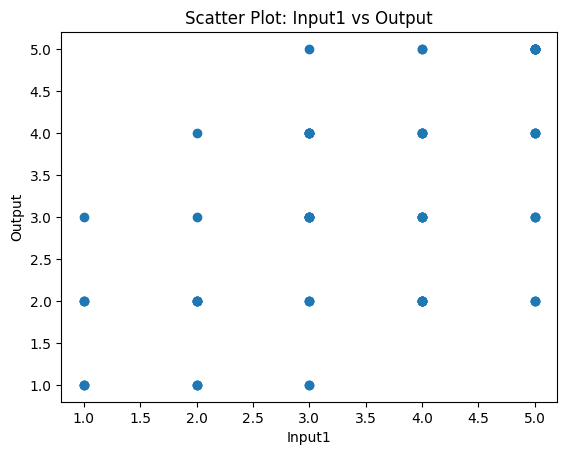

<ipython-input-6-5761166251ad>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_clean.corr()


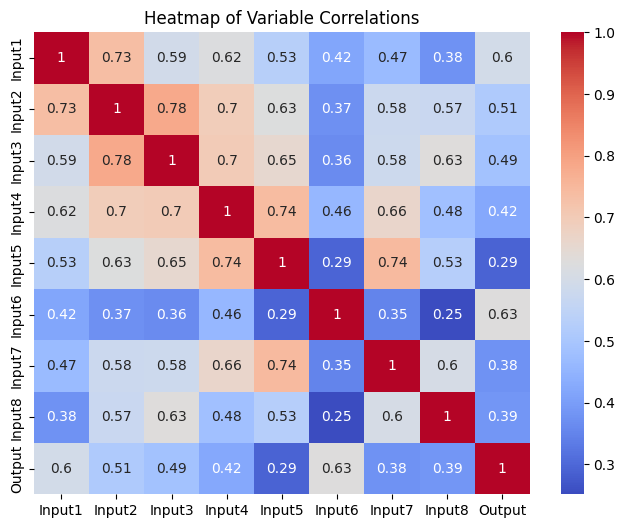

Matriks Korelasi:
          Input1    Input2    Input3    Input4    Input5    Input6    Input7  \
Input1  1.000000  0.734742  0.592669  0.622202  0.530574  0.417825  0.467889   
Input2  0.734742  1.000000  0.783534  0.695683  0.625628  0.374327  0.577988   
Input3  0.592669  0.783534  1.000000  0.700113  0.653612  0.364199  0.581866   
Input4  0.622202  0.695683  0.700113  1.000000  0.741312  0.458940  0.661093   
Input5  0.530574  0.625628  0.653612  0.741312  1.000000  0.294515  0.743007   
Input6  0.417825  0.374327  0.364199  0.458940  0.294515  1.000000  0.349974   
Input7  0.467889  0.577988  0.581866  0.661093  0.743007  0.349974  1.000000   
Input8  0.375604  0.572862  0.630123  0.479905  0.527157  0.251672  0.604494   
Output  0.596128  0.513190  0.488168  0.421735  0.290656  0.627087  0.377269   

          Input8    Output  
Input1  0.375604  0.596128  
Input2  0.572862  0.513190  
Input3  0.630123  0.488168  
Input4  0.479905  0.421735  
Input5  0.527157  0.290656  
Input6 

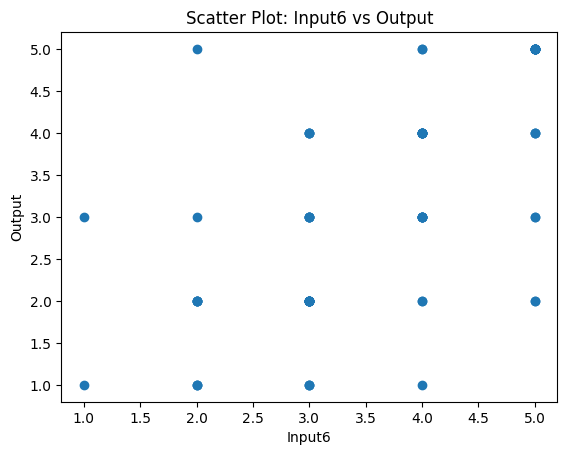

In [6]:
# Membuat DataFrame dengan beberapa input (X) dan satu output (Y)
data_clean = pd.DataFrame({
    'Input1': b,
    'Input2': c,
    'Input3': d,
    'Input4': e,
    'Input5': f,
    'Input6': g,
    'Input7': h,
    'Input8': i,
    'Input9': j,
    'Output': a
})

# Scatter plot untuk melihat hubungan antara Input1 dan Output
plt.scatter(data_clean['Input1'], data_clean['Output'])
plt.xlabel('Input1')
plt.ylabel('Output')
plt.title('Scatter Plot: Input1 vs Output')
plt.show()

# Heatmap untuk melihat korelasi antara semua variabel
correlation_matrix = data_clean.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Variable Correlations')
plt.show()

print("Matriks Korelasi:")
print(correlation_matrix)

# Pilih variabel input dengan korelasi positif terkuat
strongest_corr = correlation_matrix['Output'].sort_values(ascending=False)
print("Variabel input dengan korelasi positif terkuat:")
print(strongest_corr)

# Scatter plot untuk variabel input dengan korelasi terkuat
strongest_input = strongest_corr.index[1]  # Variabel input terkuat kecuali Output
plt.scatter(data_clean[strongest_input], data_clean['Output'])
plt.xlabel(strongest_input)
plt.ylabel('Output')
plt.title(f'Scatter Plot: {strongest_input} vs Output')
plt.show()

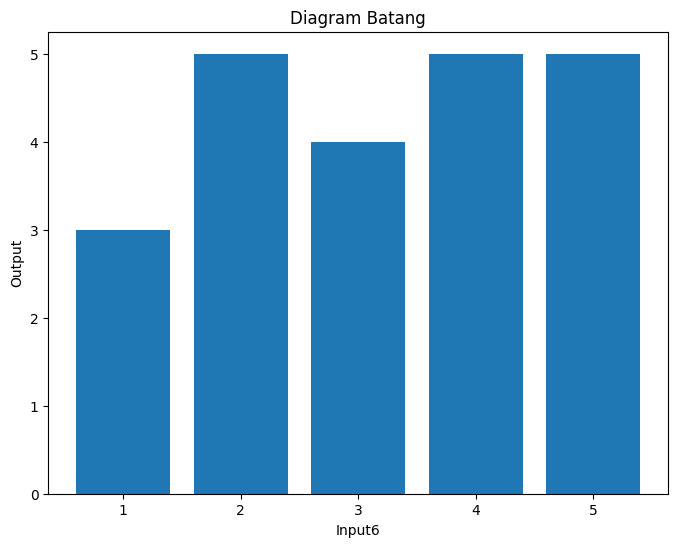

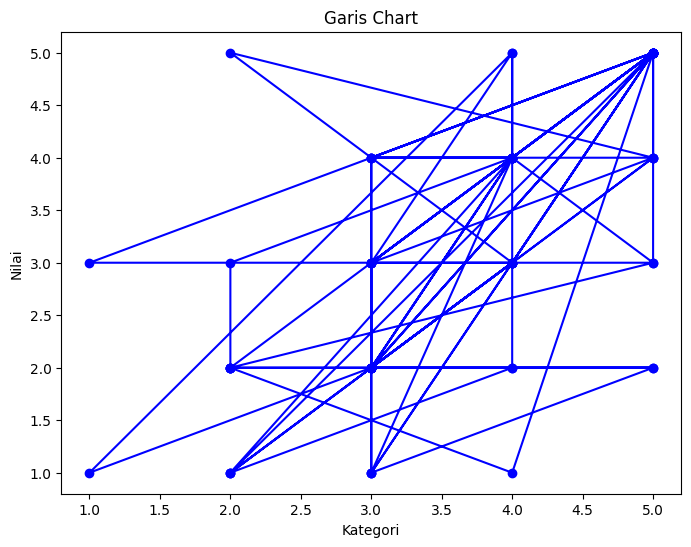

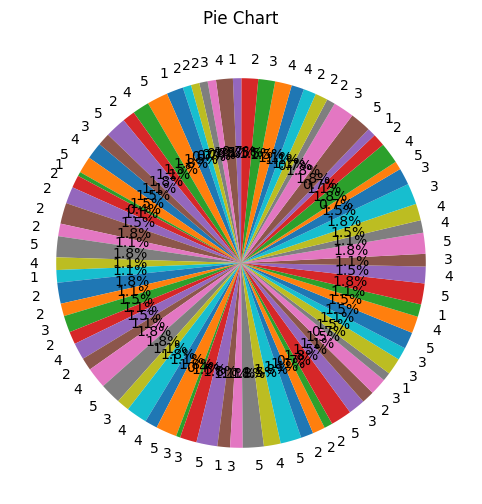

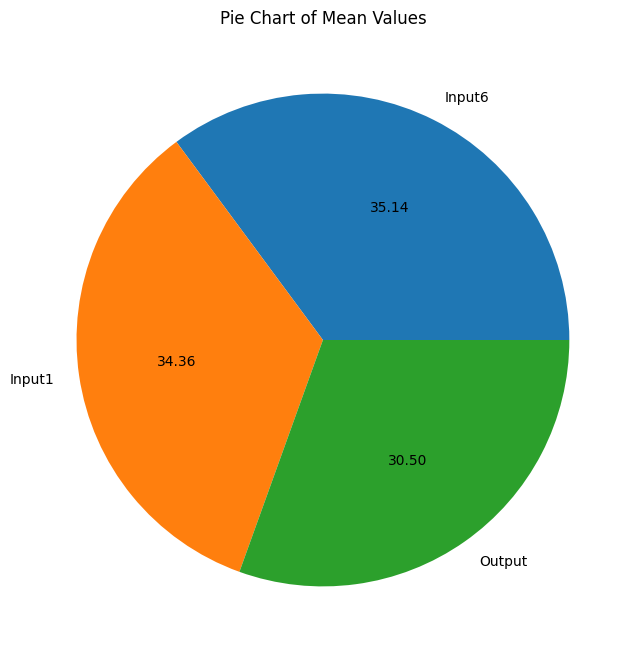

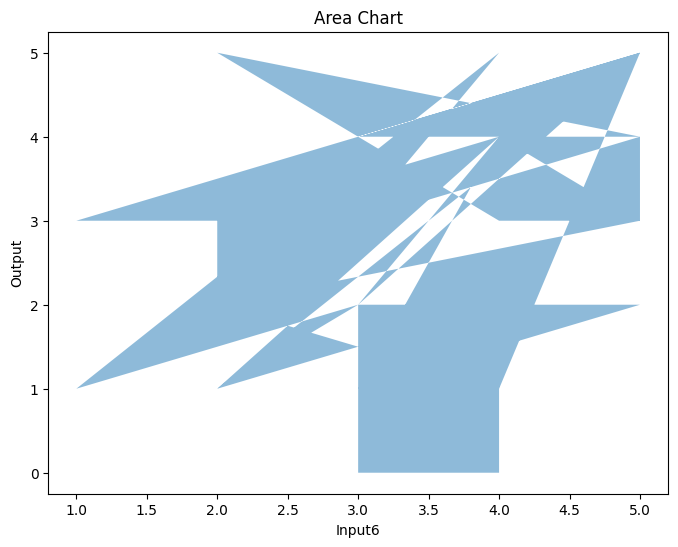

<Figure size 1200x800 with 0 Axes>

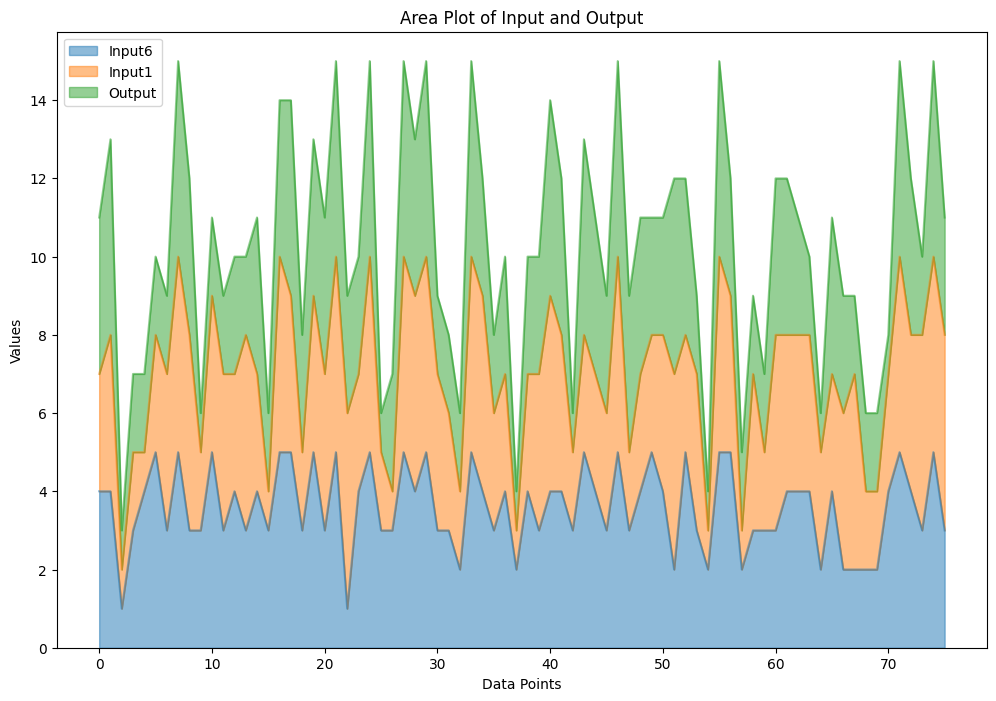

In [7]:
data_filter = data_clean[["Input6", "Input1", "Output"]]
# Diagram Batang (Bar Chart)
plt.figure(figsize=(8, 6))
plt.bar(data_clean['Input6'], data_clean['Output'])
plt.xlabel('Input6')
plt.ylabel('Output')
plt.title('Diagram Batang')
plt.show()

# Garis (Line Chart)
plt.figure(figsize=(8, 6))
plt.plot(data_clean['Input6'], data_clean['Output'], marker='o', linestyle='-', color='b')
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Garis Chart')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(data_clean['Input6'], labels=data_clean['Output'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')
plt.show()

plt.figure(figsize=(8, 8))
values = data_filter.mean().values
labels = ["Input6", "Input1", "Output"]  # Ganti label sesuai data Anda
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Pie Chart of Mean Values')
plt.show()

# Area Chart
plt.figure(figsize=(8, 6))
plt.fill_between(data_clean['Input6'], data_clean['Output'], alpha=0.5)
plt.xlabel('Input6')
plt.ylabel('Output')
plt.title('Area Chart')
plt.show()

plt.figure(figsize=(12, 8))
data_filter.plot(kind='area', alpha=0.5, figsize=(12, 8))
plt.title('Area Plot of Input and Output')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.show()

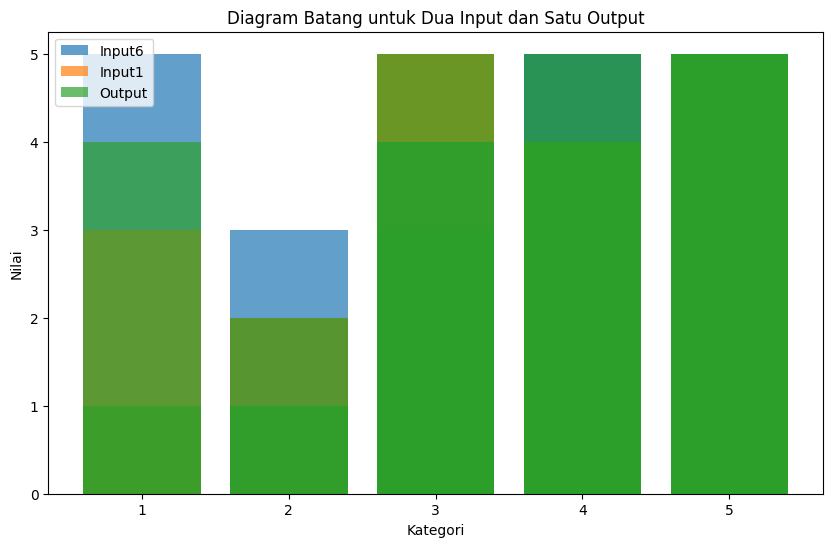

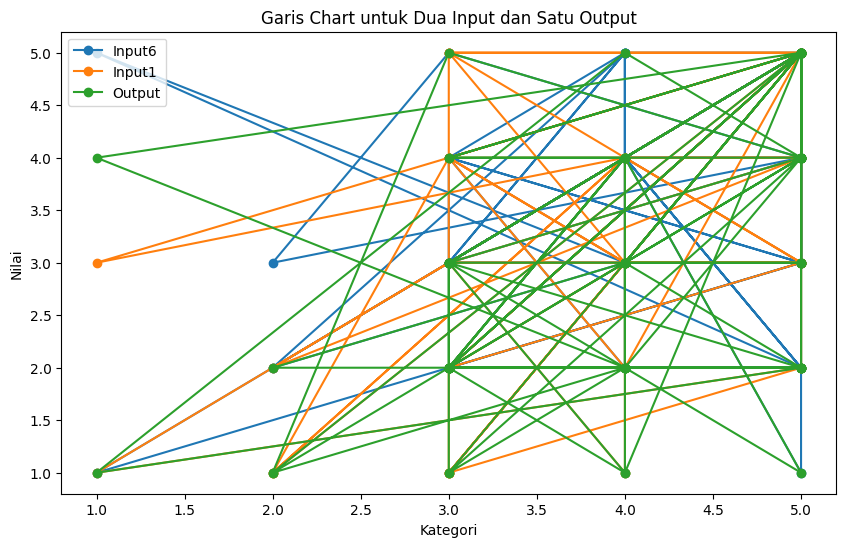

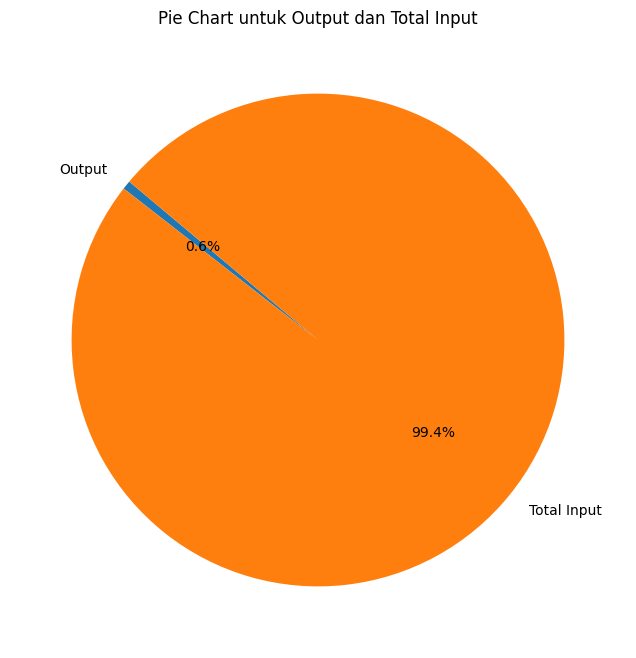

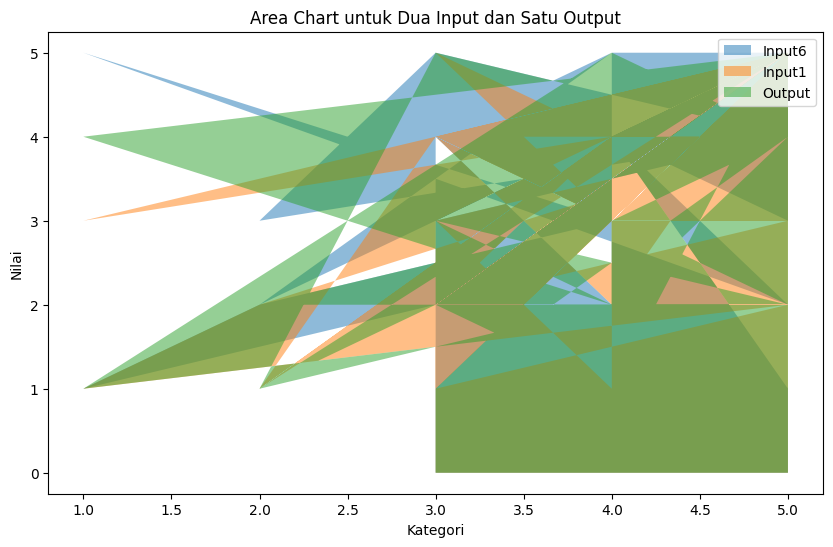

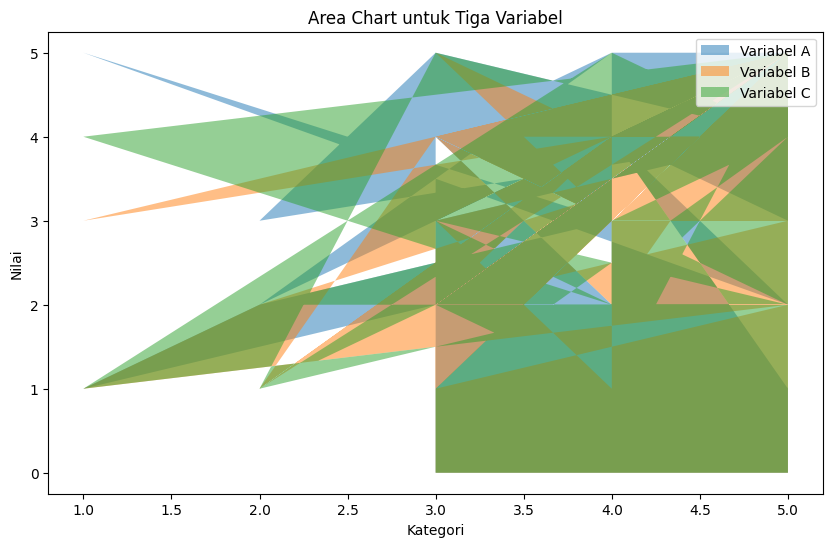

In [8]:
# Contoh DataFrame dengan tiga variabel: A, B, dan C
data = pd.DataFrame({
    'Kategori':d,
    'Input6': g,
    'Input1': b,
    'Output': a
})

# Diagram Batang (Bar Chart) untuk dua variabel input dan satu variabel output
plt.figure(figsize=(10, 6))
plt.bar(data['Kategori'], data['Input6'], label='Input6', alpha=0.7)
plt.bar(data['Kategori'], data['Input1'], label='Input1', alpha=0.7)
plt.bar(data['Kategori'], data['Output'], label='Output', alpha=0.7)
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Diagram Batang untuk Dua Input dan Satu Output')
plt.legend()
plt.show()

# Garis (Line Chart) untuk dua variabel input dan satu variabel output
plt.figure(figsize=(10, 6))
plt.plot(data['Kategori'], data['Input6'], marker='o', label='Input6')
plt.plot(data['Kategori'], data['Input1'], marker='o', label='Input1')
plt.plot(data['Kategori'], data['Output'], marker='o', label='Output')
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Garis Chart untuk Dua Input dan Satu Output')
plt.legend()
plt.show()

# Pie Chart untuk satu variabel output (gunakan data rata-rata)
average_output = data['Output'].mean()
total_input = data[['Input6', 'Input1']].sum()
labels = ['Output', 'Total Input']
values = [average_output, total_input.sum()]
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart untuk Output dan Total Input')
plt.show()

# Area Chart untuk dua variabel input dan satu variabel output
plt.figure(figsize=(10, 6))
plt.fill_between(data['Kategori'], data['Input6'], alpha=0.5, label='Input6')
plt.fill_between(data['Kategori'], data['Input1'], alpha=0.5, label='Input1')
plt.fill_between(data['Kategori'], data['Output'], alpha=0.5, label='Output')
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Area Chart untuk Dua Input dan Satu Output')
plt.legend()
plt.show()

# Area Chart untuk ketiga variabel
plt.figure(figsize=(10, 6))
plt.fill_between(data['Kategori'], data['Input6'], alpha=0.5, label='Variabel A')
plt.fill_between(data['Kategori'], data['Input1'], alpha=0.5, label='Variabel B')
plt.fill_between(data['Kategori'], data['Output'], alpha=0.5, label='Variabel C')
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Area Chart untuk Tiga Variabel')
plt.legend()
plt.show()

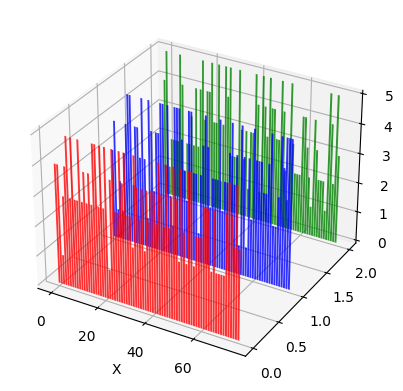

In [9]:
#High Dimensional dan Multivariate Scatter Plot
dades01 = data_clean['Input6'].tolist()
dades02 = data_clean['Input1'].tolist()
dades03 = data_clean['Output'].tolist()

colors = ['r', 'b', 'g', 'y', 'b', 'p']
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for n, i in enumerate([dades01, dades02, dades03]):
    xs = np.arange(len(i))
    ys = i
    zs = n
    cs = colors[n]
    ax.bar(xs, ys, zs, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('')
ax.set_zlabel('Z')
plt.show()

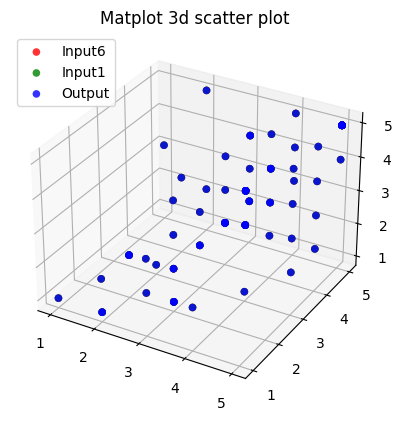

In [10]:
x = data_clean['Input6']
y = data_clean['Input1']
z = data_clean['Output']
data = (x, y, z)
colors = ("red", "green", "blue")
groups = ("Input6", "Input1", "Output")
# Create plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for data, color, group in zip(data, colors, groups):
  ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.title('Matplot 3d scatter plot')
plt.legend (loc=2)
plt.show()

Jumlah NaN sebelum penggantian:
Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?                                                    0
Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?            0
Seberapa penting bagi Anda mendapatkan rekomendasi tempat kuliner yang sesuai dengan preferensi makanan yang Anda sukai?    0
dtype: int64
Jumlah NaN setelah penggantian:
Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?                                                    0
Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?            0
Seberapa penting bagi Anda mendapatkan rekomendasi tempat kuliner yang sesuai dengan preferensi makanan yang Anda sukai?    0
dtype: int64


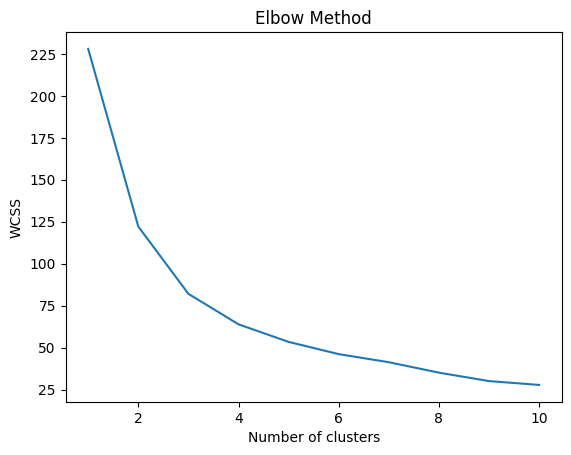

    Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?  \
0                                                 4.0                          
1                                                 5.0                          
2                                                 1.0                          
3                                                 2.0                          
4                                                 2.0                          
..                                                ...                          
71                                                5.0                          
72                                                4.0                          
73                                                2.0                          
74                                                5.0                          
75                                                3.0                          

    Seberapa sering Anda mencari refere

In [11]:
#Clustering
df = pd.DataFrame(data={'Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?': a, 'Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?': b, 'Seberapa penting bagi Anda mendapatkan rekomendasi tempat kuliner yang sesuai dengan preferensi makanan yang Anda sukai?': d})

# Identifikasi dan tangani nilai NaN
print("Jumlah NaN sebelum penggantian:")
print(df.isnull().sum())

# Gantilah nilai NaN dengan nilai rata-rata
imputer = SimpleImputer(strategy='mean')
df_imputed_values = imputer.fit_transform(df)

# Pastikan bahwa hasil penggantian nilai NaN memiliki nilai yang valid
print("Jumlah NaN setelah penggantian:")
print(pd.DataFrame(df_imputed_values, columns=df.columns).isnull().sum())

# Buat DataFrame baru setelah penggantian nilai NaN
df_imputed = pd.DataFrame(df_imputed_values, columns=df.columns)

# Normalisasi Data setelah mengatasi NaN
scaler = StandardScaler()
data_scaled_imputed = scaler.fit_transform(df_imputed)

# Menentukan Jumlah Cluster dengan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled_imputed)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Terapkan K-Means dengan Jumlah Cluster yang Optimal
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_imputed['Cluster'] = kmeans.fit_predict(data_scaled_imputed)
df_imputed.to_excel("clustered_data.xlsx", index=False)

# Tampilkan hasil
print(df_imputed)

Percentage of Data for Training: 80.0%
Percentage of Data for Testing: 20%
Accuracy: 93.75%


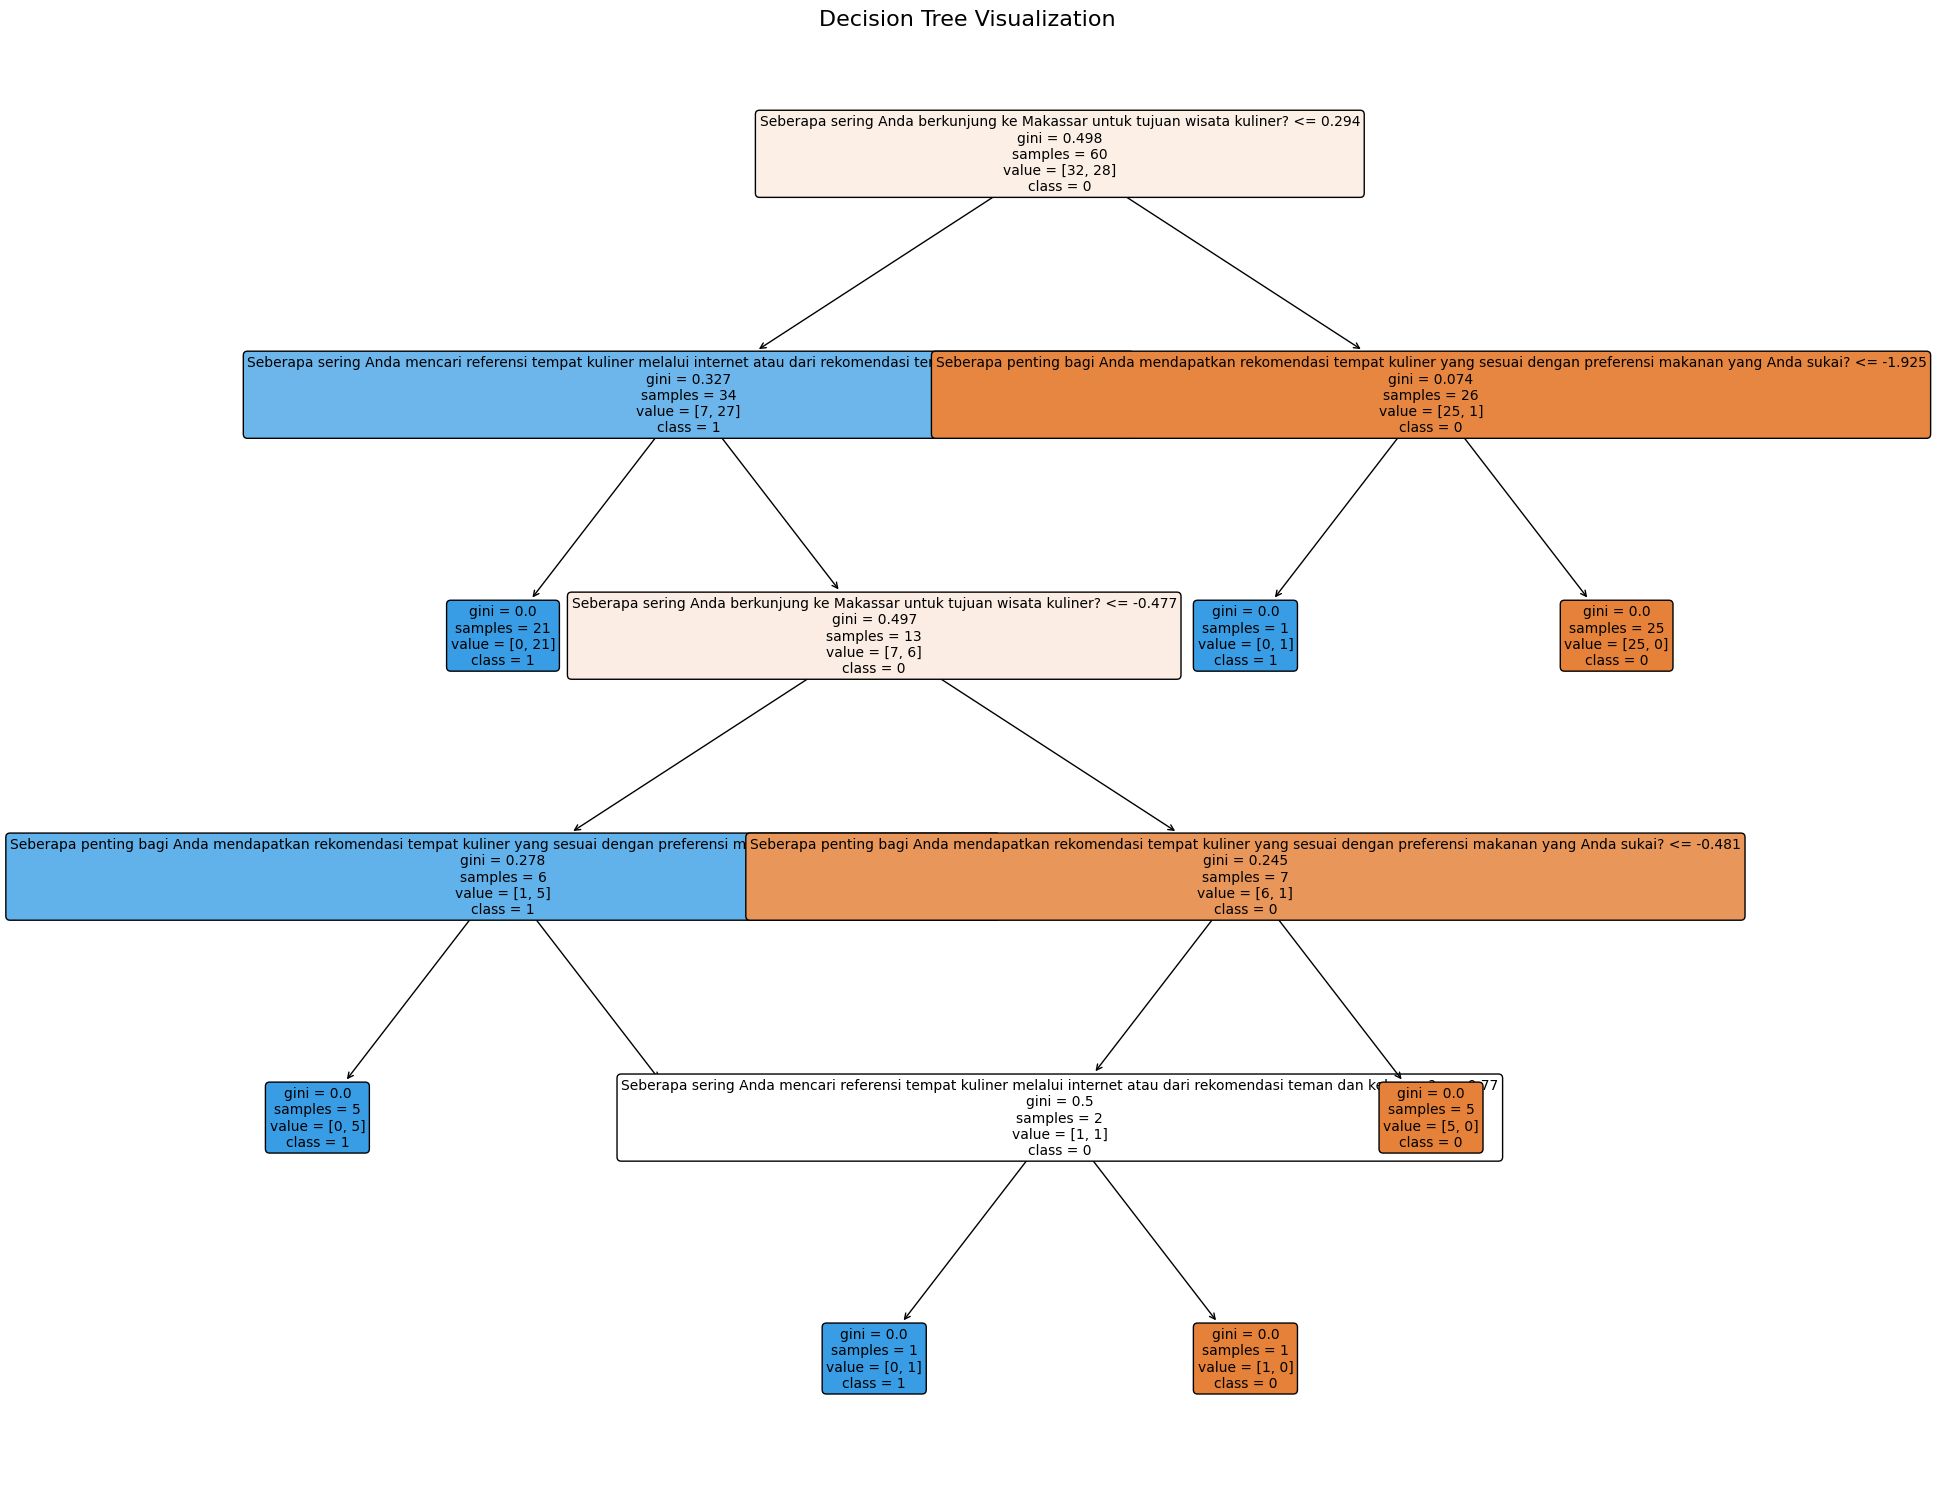

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled_imputed, df_imputed['Cluster'], test_size=0.2, random_state=42)

# Calculate the percentage of data used for training and testing
percentage_training = (1 - 0.2) * 100
percentage_testing = 20

print(f"Percentage of Data for Training: {percentage_training}%")
print(f"Percentage of Data for Testing: {percentage_testing}%")

# Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize the Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(tree_model, filled=True, feature_names=df_imputed.columns[:-1], class_names=[str(i) for i in range(len(tree_model.classes_))], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.tight_layout()
plt.show()

Random Forest Accuracy: 93.75%


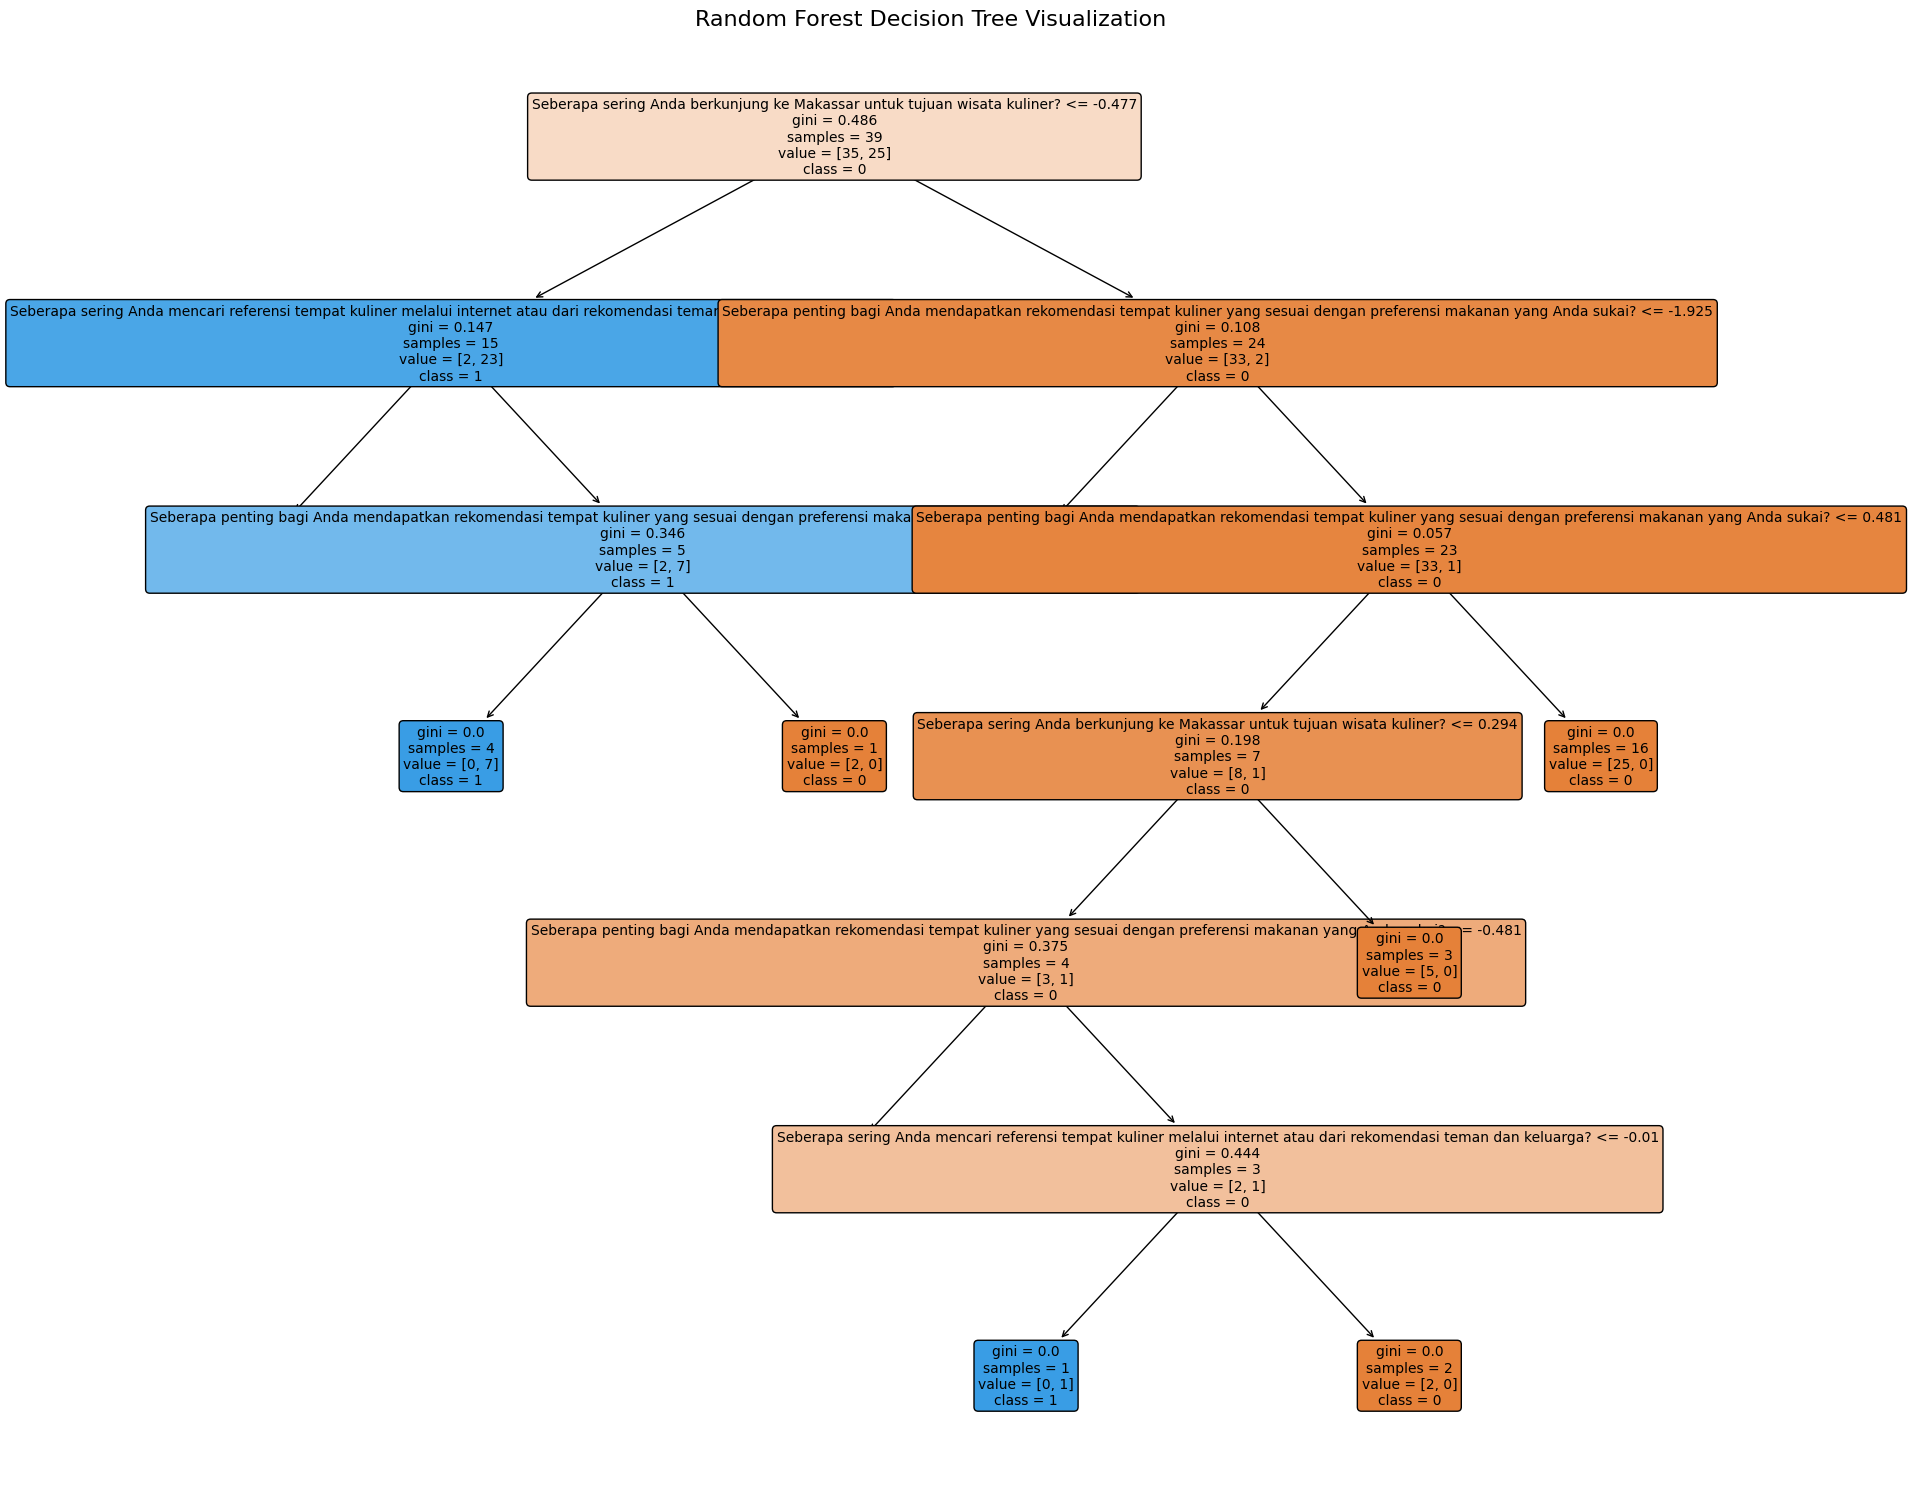

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the Random Forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the Random Forest model's accuracy
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Accuracy: {accuracy_forest * 100:.2f}%")

# Visualize one of the decision trees in the Random Forest (e.g., the first tree)
plt.figure(figsize=(20, 15))
plot_tree(forest_model.estimators_[0], filled=True, feature_names=df_imputed.columns[:-1], class_names=[str(i) for i in range(len(forest_model.classes_))], rounded=True, fontsize=10)
plt.title("Random Forest Decision Tree Visualization", fontsize=16)
plt.tight_layout()
plt.show()


In [14]:
# Analisis Karakteristik Cluster
if 'Cluster' in df_imputed.columns:
    cluster_characteristics = df_imputed.groupby('Cluster').median()  # Ganti 'mean' dengan 'median' jika ingin menggunakan median

    # Tampilkan hasil analisis karakteristik cluster
    print("Analisis Karakteristik Cluster:")
    print(cluster_characteristics)
else:
    print("Kolom 'Cluster' tidak ditemukan dalam DataFrame.")

Analisis Karakteristik Cluster:
         Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?  \
Cluster                                                                             
0                                                      4.0                          
1                                                      2.0                          

         Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?  \
Cluster                                                                                                                     
0                                                      5.0                                                                  
1                                                      3.0                                                                  

         Seberapa penting bagi Anda mendapatkan rekomendasi tempat kuliner yang sesuai dengan preferensi makanan yang Anda suk

In [15]:
n_clust = 2
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_
print('X Labels: ')
print(X['Labels'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


X Labels: 
0     0
1     0
2     1
3     0
4     1
     ..
71    0
72    0
73    0
74    0
75    0
Name: Labels, Length: 76, dtype: int32


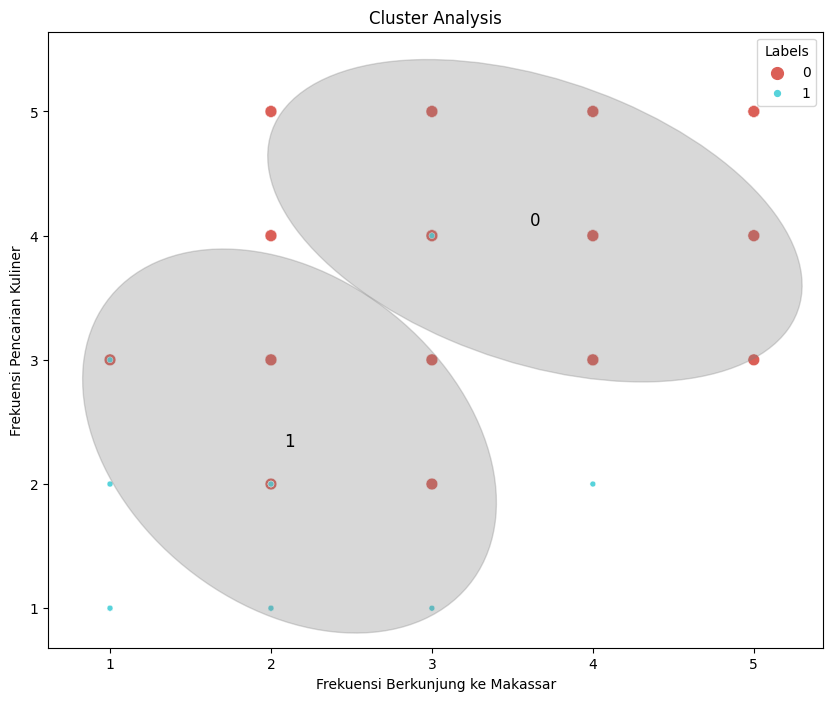

In [16]:
from matplotlib.patches import Ellipse
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?',
    y='Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?',
    hue='Labels',
    markers=True,
    size='Labels',
    palette=sns.color_palette('hls', n_clust),
    data=X
)

for label in X['Labels'].unique():
    cluster_data = X[X['Labels'] == label]
    cluster_center = (
        cluster_data['Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?'].mean(),
        cluster_data['Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?'].mean()
    )
    cluster_cov = cluster_data[['Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?', 'Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?']].cov()

    eigenvalues, eigenvectors = np.linalg.eigh(cluster_cov)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 1]))

    ell = Ellipse(cluster_center, 2 * np.sqrt(2.0 * eigenvalues[0]), 2 * np.sqrt(2.0 * eigenvalues[1]), angle=angle, color='gray', alpha=0.3)
    plt.gca().add_patch(ell)

    # Tambahkan tulisan '0' atau '1' pada elips
    plt.text(cluster_center[0], cluster_center[1], str(label), color='black', fontsize=12, ha='center', va='center')

plt.title('Cluster Analysis')
plt.xlabel('Frekuensi Berkunjung ke Makassar')
plt.ylabel('Frekuensi Pencarian Kuliner')
plt.show()

In [17]:
## Analisis Karakteristik Cluster
cluster_characteristics = df_imputed.groupby('Cluster').median()  # Menggunakan median sebagai contoh

# Tampilkan hasil analisis karakteristik cluster
print("Analisis Karakteristik Cluster:")
print(cluster_characteristics)

Analisis Karakteristik Cluster:
         Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?  \
Cluster                                                                             
0                                                      4.0                          
1                                                      2.0                          

         Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?  \
Cluster                                                                                                                     
0                                                      5.0                                                                  
1                                                      3.0                                                                  

         Seberapa penting bagi Anda mendapatkan rekomendasi tempat kuliner yang sesuai dengan preferensi makanan yang Anda suk

In [18]:
# Segmentasi Target
target_segment = df_imputed.groupby('Cluster').median()  # Menggunakan mean sebagai contoh

# Tampilkan hasil segmentasi target
print("Segmentasi Target:")
print(target_segment)

Segmentasi Target:
         Seberapa sering Anda berkunjung ke Makassar untuk tujuan wisata kuliner?  \
Cluster                                                                             
0                                                      4.0                          
1                                                      2.0                          

         Seberapa sering Anda mencari referensi tempat kuliner melalui internet atau dari rekomendasi teman dan keluarga?  \
Cluster                                                                                                                     
0                                                      5.0                                                                  
1                                                      3.0                                                                  

         Seberapa penting bagi Anda mendapatkan rekomendasi tempat kuliner yang sesuai dengan preferensi makanan yang Anda sukai?  
Cluster

In [19]:
#Evaluasi dan Validasi menggunakan silhouette score atau Davies-Bouldin index
clustered_data = df_imputed
features = clustered_data.drop('Cluster', axis=1)
labels = clustered_data['Cluster']
silhouette_avg = silhouette_score(features, labels)
print(f"Silhouette Score: {silhouette_avg}")
davies_bouldin_idx = davies_bouldin_score(features, labels)
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")

Silhouette Score: 0.38830968831497403
Davies-Bouldin Index: 0.9768909079751189


In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib


X['Labels'] = kmeans.fit_predict(data_scaled_imputed)

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']